Preethi Ann Jacob  

**Classify handwritten digits 0-9:**

Using Deep learning(/Neural Network) with tensorflow.keras Python module using MNIST Digit Classification dataset.
Reference: geeksforgeeks

In [1]:
#importing all dependencies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

MNIST = The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.  

To see details on Digit Classification MNIST dataset:  
https://keras.io/api/datasets/mnist/  
http://yann.lecun.com/exdb/mnist/

In [2]:
# Import data
mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

load_data() loads the dataset as training and testing dataset. 

x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.  
y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.
x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.  
y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

Train Label 0 : 5


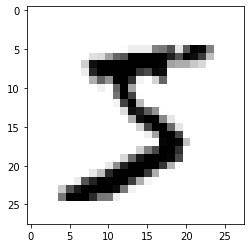

Train Label 1 : 0


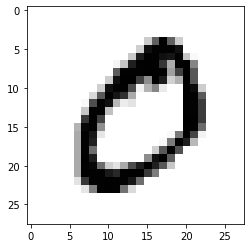

Train Label 2 : 4


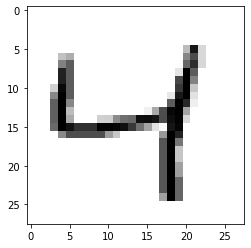

Train Label 3 : 1


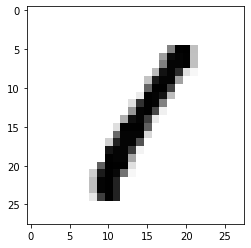

Train Label 4 : 9


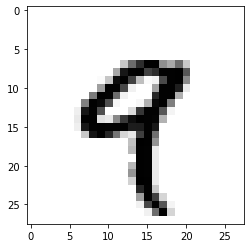

Train Label 5 : 2


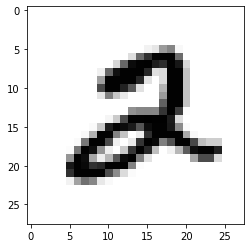

Train Label 6 : 1


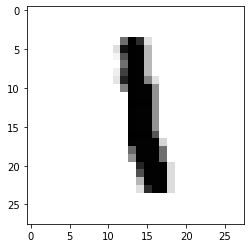

Train Label 7 : 3


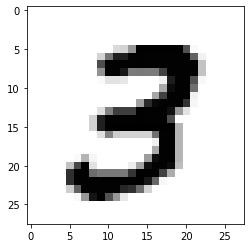

Train Label 8 : 1


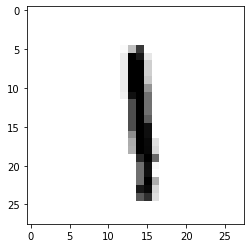

Train Label 9 : 4


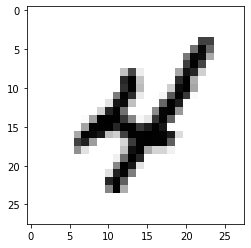

Test Label 0 : 7


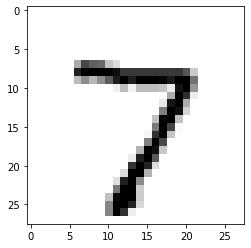

Test Label 1 : 2


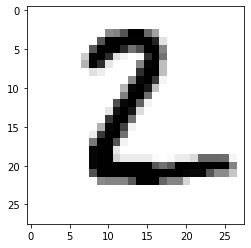

Test Label 2 : 1


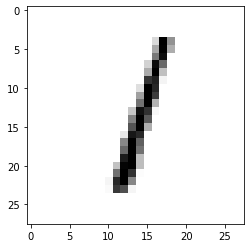

Test Label 3 : 0


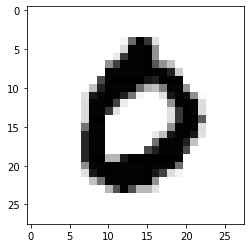

Test Label 4 : 4


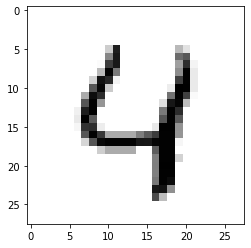

Test Label 5 : 1


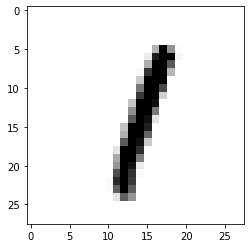

Test Label 6 : 4


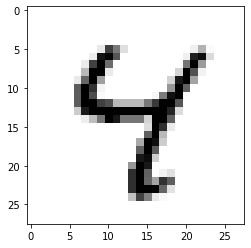

Test Label 7 : 9


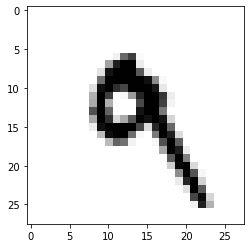

Test Label 8 : 5


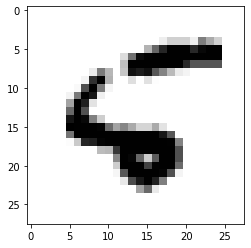

Test Label 9 : 9


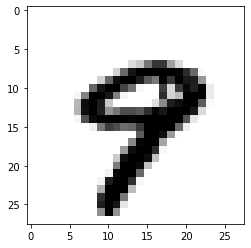

In [3]:
# View data before normalization 
def draw(n):
    plt.imshow(n,cmap=plt.cm.binary) # cmap=colourmap
    plt.show()
    
# See first 10 indexed training data with labels
for i in range(0,10):
    print("Train Label",i,":",y_train[i])
    draw(x_train[i])
    
# See first 10 indexed testing data with labels
for i in range(0,10):
    print("Test Label",i,":",y_test[i])
    draw(x_test[i])

In [4]:
# Normalize the data
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

Train Label 0 : 5


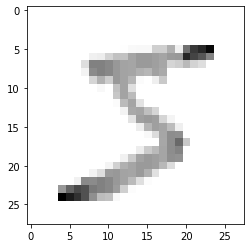

Train Label 1 : 0


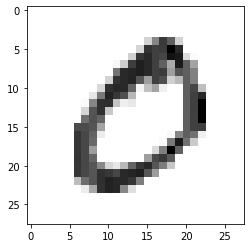

Train Label 2 : 4


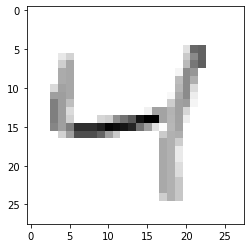

Train Label 3 : 1


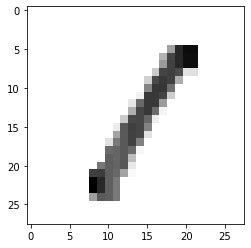

Train Label 4 : 9


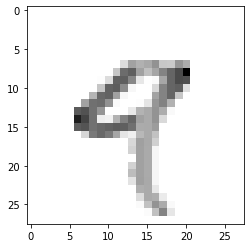

Train Label 5 : 2


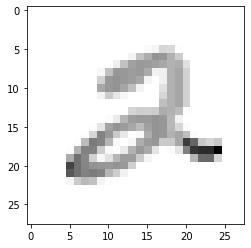

Train Label 6 : 1


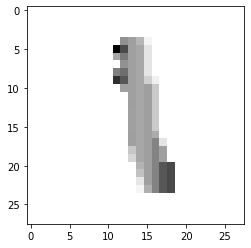

Train Label 7 : 3


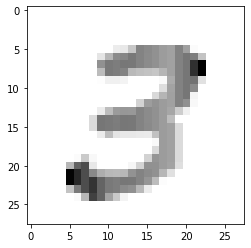

Train Label 8 : 1


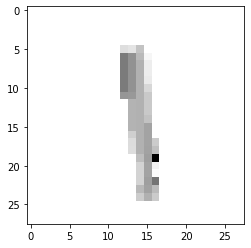

Train Label 9 : 4


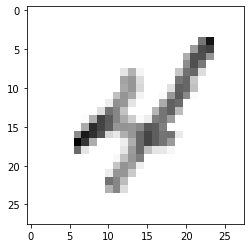

Test Label 0 : 7


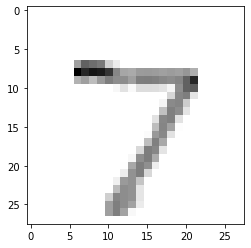

Test Label 1 : 2


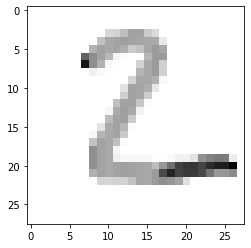

Test Label 2 : 1


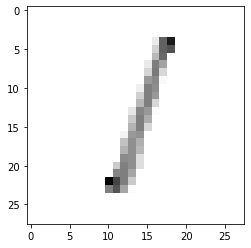

Test Label 3 : 0


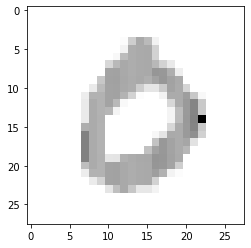

Test Label 4 : 4


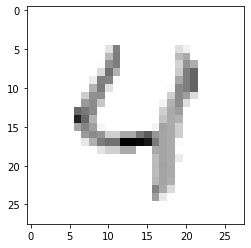

Test Label 5 : 1


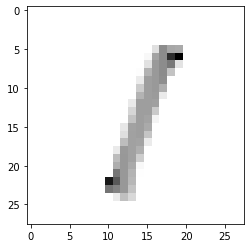

Test Label 6 : 4


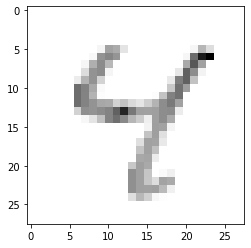

Test Label 7 : 9


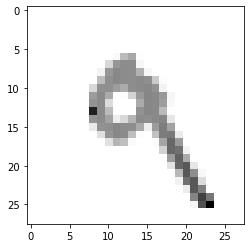

Test Label 8 : 5


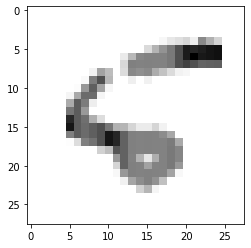

Test Label 9 : 9


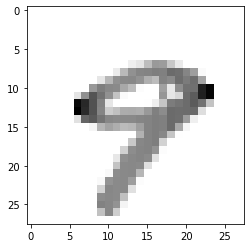

In [5]:
# View data after normalization 
    
# See first 10 indexed training data with labels
for i in range(0,10):
    print("Train Label",i,":",y_train[i])
    draw(x_train[i])
    
# See first 10 indexed testing data with labels
for i in range(0,10):
    print("Test Label",i,":",y_test[i])
    draw(x_test[i])

Normalize the image so that values ranging from 0..255 can be changed to 0..1  

Doubt:   
tf.keras.utils.normalize with axis=0,1,2 alone runs without error.   
But Drawn images shows that it is not just black or white. It seems to be scaling only along the mentioned axis=1.  
Not sure if this is the correct method of normalization.

In [6]:
# make a neural network and train it 
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

model.summary()

Epoch 1/3
1875/1875 [==============================] - 9s 2ms/step - loss: 0.2602 - accuracy: 0.9240
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1058 - accuracy: 0.9672
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0727 - accuracy: 0.9762
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118

The sequential model allows us to specify a neural network, precisely, sequential: from input to output, passing through a series of neural layers, one after the other. We create sequential model and add layers one at a time until we are happy with our network architecture. 

Flatten is used to convert 2d to 1d while keeping the batch size same.  

Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True). These are all attributes of Dense. 

Hidden layer1 has 128 nodes with relu activation.   
Hidden layer2 has 128 nodes with relu activation again.   
Hidden layer 3 has 10 nodes with softmax activation.  

The compilation is the final step in creating a model. Once the compilation is done, we can move on to training phase.  
Optimization is an important process which optimize the input weights by comparing the prediction and the loss function.  
Metrics is used to evaluate the performance of your model.   

Fit function evaluates our model on training.  
Epochs = no of times the model is needed to be evaluated during training.

In [7]:
# check model accuracy and loss using the test dataset
val_loss,val_acc = model.evaluate(x_test,y_test)
print("loss-> ",val_loss,"\nacc-> ",val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0966 - accuracy: 0.9700
loss->  0.09663784503936768 
acc->  0.9700000286102295


313/313 [==============================] - 0s 1ms/step
Index ->  0
label ->  7
prediction ->  7


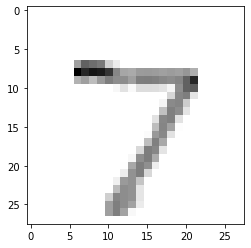

Index ->  1
label ->  2
prediction ->  2


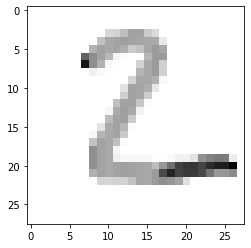

Index ->  2
label ->  1
prediction ->  1


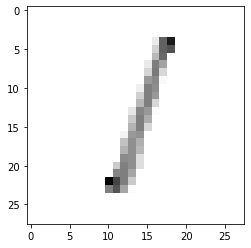

Index ->  3
label ->  0
prediction ->  0


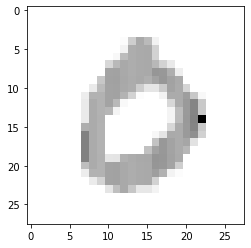

Index ->  4
label ->  4
prediction ->  4


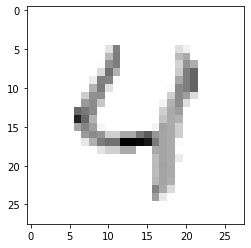

Index ->  5
label ->  1
prediction ->  1


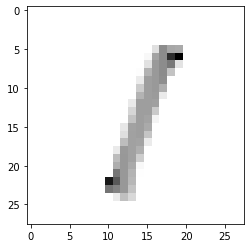

Index ->  6
label ->  4
prediction ->  4


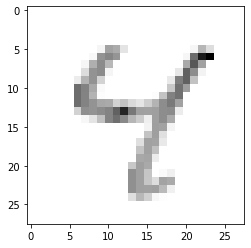

Index ->  7
label ->  9
prediction ->  9


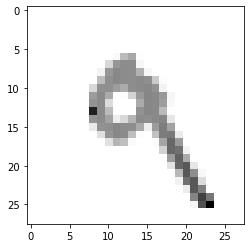

Index ->  8
label ->  5
prediction ->  5


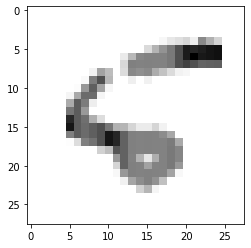

Index ->  9
label ->  9
prediction ->  9


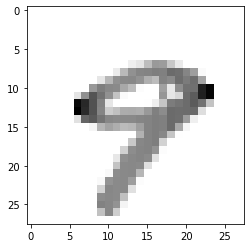

In [8]:
# prediction using model 
predictions=model.predict([x_test])

for i in range(0,10):
    print('Index -> ',i)
    print('label -> ',y_test[i])
    print('prediction -> ',np.argmax(predictions[i]))
    
    draw(x_test[i])

In [9]:
#saving the model
# .h5 or .model can be used

model.save('epic_num_reader.h5')

In [10]:
# loading the saved model
new_model = tf.keras.models.load_model('epic_num_reader.h5')

313/313 [==============================] - 1s 1ms/step
Index ->  0
label ->  7
prediction ->  7


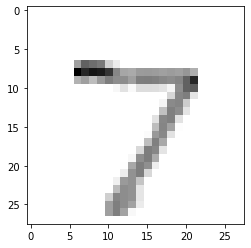

Index ->  1
label ->  2
prediction ->  2


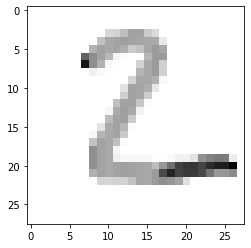

Index ->  2
label ->  1
prediction ->  1


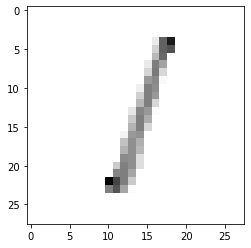

Index ->  3
label ->  0
prediction ->  0


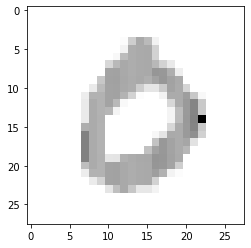

Index ->  4
label ->  4
prediction ->  4


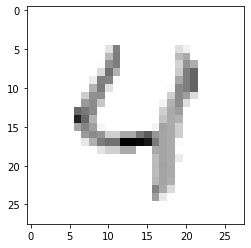

Index ->  5
label ->  1
prediction ->  1


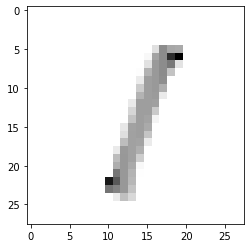

Index ->  6
label ->  4
prediction ->  4


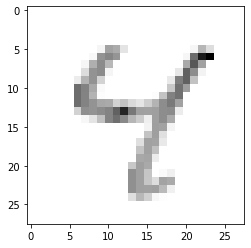

Index ->  7
label ->  9
prediction ->  9


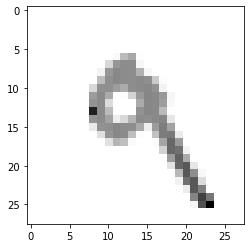

Index ->  8
label ->  5
prediction ->  5


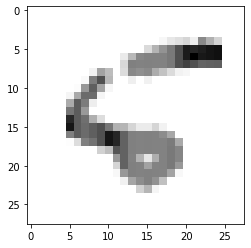

Index ->  9
label ->  9
prediction ->  9


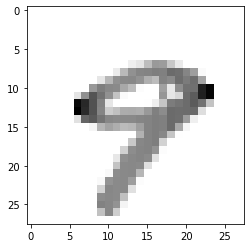

In [11]:
# prediction using new model

predictions=new_model.predict([x_test])

for i in range(0,10):
    print('Index -> ',i)
    print('label -> ',y_test[i])
    print('prediction -> ',np.argmax(predictions[i]))
    
    draw(x_test[i])